An important topic in regulatory capital modelling in banking is the concept of credit risk. Credit risk is the loss to a bank's portfolio of loans when their customers start to default on their loans (i.e., not pay their loan repayments, or missing their repayments). These loans can be home loans, credit cards, car loans, personal loans, corporate loans, etc. (i.e., mortgages, revolving lines of credit, retail loans, whole sale loans).

Typically, expected loss (i.e., credit risk) is given as follows,

EL = PD \times LGD \times EAD 

EL=PD×LGD×EAD
where EL is Expected Loss, PD is Probability of Default, LGD is Loss Given Default, and EAD is Exposure at Default.

According to F-IRB (Foundation-Internal Ratings Based) banks calculate their own PD risk parameter, while the other risk parameters such as LGD and EAD are provided by the nation's banking supervisor (i.e., APRA in Australia, the FED/OCC in US, PRA in UK) except for retail exposures. The Basel A-IRB (Advanced-Internal Ratings Based) allows banks to calculate all of their own risk parameters subject to certain regulatory guidelines.

Since mortgages are an important component of a bank's lending activity and business, we explore a mortgage dataset from Kaggle. In the Kaggle dataset, we are given information on customers of a bank and whether or not they have defaulted on their home loans. Thus, the task at hand is modelling the probability of default PD. As PD is a basic modelling requirement of credit risk modelling, this is an excellent introduction into credit risk.

Machine Learning applications are made up of the following steps

1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Machine Learning Algorithm Selection
4. Hyper-parameter tuning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Label Encoding

Label encoding is when we have a 2-state categorical variable (i.e., Y/N, M/F) where we replace these with 1s and 0s (i.e., Y=1/N=0, M=1/F=0). One-hot encoding is when we have we create a separate feature for each category (i.e., Y, N, M, F) and where you have Y, the feature column of Y will be 1 and feature column of N is 0.

We perform label encoding for 2-state categorical variables due reduce the size of the feature set, and perform one-hot encoding for categories with N-states for accuracy.

We see below that for the training (test) dataset, x3 (x4) columns were 2-state categorical variables. This is because as found in the previous analysis on "Comparing training and test" datasets, we found that in the training dataset, the CODE_GENDER has an additional categorical entry labeled XNA that does not exist in the test dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['NAME_CONTRACT_TYPE'] = le.fit_transform(df_train['NAME_CONTRACT_TYPE'])
df_train['FLAG_OWN_CAR'] = le.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['FLAG_OWN_REALTY'] = le.fit_transform(df_train['FLAG_OWN_REALTY'])

df_test['NAME_CONTRACT_TYPE'] = le.fit_transform(df_test['NAME_CONTRACT_TYPE'])
df_test['CODE_GENDER'] = le.fit_transform(df_test['CODE_GENDER'])
df_test['FLAG_OWN_CAR'] = le.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['FLAG_OWN_REALTY'] = le.fit_transform(df_test['FLAG_OWN_REALTY'])

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## One-hot Encoding

One-hot encoding is performed by the get_dummies function in Pandas.

In [ ]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(307511, 243)
(48744, 238)


We can see that the number of feature columns has gone up from 122 to 244. This is because one-hot encoding creates an additional feature column for every entry in a categorical column. Thus label-encoding helps to reduce the number of feature variables for 2-state categorical variables.

We also see that the training and test datasets have different number of feature columns.

In [ ]:
train_col = set(df_train.columns)
test_col = set(df_test.columns)

exc_col = train_col-test_col
print(exc_col)

{'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown', 'CODE_GENDER_F', 'CODE_GENDER_XNA', 'CODE_GENDER_M', 'TARGET'}


## Aligning training and test datasets

We need to align both the training and testing datasets to have the same number of features, otherwise the machine learning technique does not work if both datasets have different sets of features.

Thus, we store the TARGET column in another variable as we need it to be in the training dataset. In the align function, we are performing an INNER join on the axis=1 that are the columns so it will only retain features that exist in both datasets. We then add in the TARGET column back to the training dataset.

In [ ]:
train_target_labels = df_train['TARGET']
df_train_align, df_test_align = df_train.align(df_test,join='inner',axis=1)
df_train_align['TARGET'] = train_target_labels

In [ ]:
print('Training dataset shape: '.format(0),df_train_align.shape)
print('Testing dataset shape: '.format(0),df_test_align.shape)

Training dataset shape:  (307511, 238)
Testing dataset shape:  (48744, 237)


## Selection of feature set for model training & testing

Assign which ever datasets you want to train and test. This is because as part of feature engineering, you will often build new and different feature datasets and would like to test each one out to evaluate whether it improves model performance.

As the imputer is being fitted on the training data and used to transform both the training and test datasets, the training data needs to have the same number of features as the test dataset. This means that the TARGET column must be removed from the training dataset.

For the SVM, we use a sample of 5000 from the original dataset as fitting the SVM on all available data (i.e., 48744 entries) would be too computationally intensive.

In [ ]:
train = df_train_align.copy()
test = df_test_align.copy()

In [ ]:
train_labels = train.pop('TARGET')

## Feature set preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

We fit the imputer and scaler on the training data, and perform the imputer and scaling transformations on both the training and test datasets.

In [ ]:
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

## Model implementation **(SVM)**

We perform a basic exercise of further splitting our training dataset into test and train datasets. Our test datasets are 20% the size of our training datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=50)

In [ ]:
from sklearn import svm
from sklearn import metrics
svm1 = svm.SVC(verbose=True)
svm1.fit(X_train,y_train)

[LibSVM]

Once we have used out trained model to predict the target label from X_test, we calculate the Accuracy and ROC AUC Score metrics.

In [ ]:
y_pred = svm1.predict(X_test)
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test,y_pred)))
print('ROC AUC Score: {}'.format(metrics.roc_auc_score(y_test,y_pred)))

We can see that our basic SVM model performs similarly to random guesses as the AUC-ROC value produced is 0.5 which means our model is performing poorly. We will first try improving our model using cross-validation and then hyper parameter tuning our model

## Cross validation

We use a 10-fold cross validation to evaluate how well our model performs.

In [ ]:
from sklearn.model_selection import cross_val_score
n_folds = 10
scores = cross_val_score(svm1, X_train, y_train, cv=n_folds, scoring='roc_auc', n_jobs=-1) #cv is cross validation

In [ ]:
fold_names = list(range(n_folds))
fold_names.append('Average')

avg_score = scores.mean()
scores = list(scores)
scores.append(avg_score)
cv_score = pd.DataFrame({'Fold Index': fold_names, 'ROC AUC (Norm)':scores, })

cv_score

We find that on our cross validation exercise, the ROC AUC score is higher at 0.61. Cross validation has an in-sample effect, thus that may be why our model is performing better than we use a completely out of sample dataset such as X_test to obtain y_test.

## Cross validation (Stratified K-fold)

Stratified K-fold differs from regular K-fold cross validation such that stratification leads to the rearrangement of the dataset to ensure that each fold is a good representative of the whole dataset For example, if we have two classes (i.e., binary classification) in our dataset where Target=1 is 30% and Target=0 is 70%, stratification will ensure that in each fold, each Target=1 and Target=0 will be accurately represented in the 30-70 context. Thus, stratification is a better scheme especially when the datasets are imbalanced (i.e., proportion of different classes are very different, 99-1) and leads to improved outcomes terms of bias and variance when compared to regular cross-validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold
strat_scores = cross_val_score(svm1,X_train,y_train,cv=StratifiedKFold(10,random_state=50,shuffle=True),scoring='roc_auc',n_jobs=-1)

In [ ]:
avg_strat_score = strat_scores.mean()
strat_scores = list(strat_scores)
strat_scores.append(avg_strat_score)

cv_score['ROC AUC (Strat)'] = strat_scores
cv_score

We can see that the outcomes of K-fold and Stratified K-fold are similar.

## Hyperparameter tuning

Most machine learning models have parameters that need to be tuned to optimize the models performance. As SVM is relatively less complicated compared to Decision Trees, Random Forest, and Gradient Boosted Trees we go through a relatively straight forward example on how to approach hyper parameter tuning.

### Polynomial degrees parameter

SVMs can perform non-linear classification and this is performed using kernel=poly or kernel=rbf. Although rbf is the more popular kernel in practice, poly with a degree of 2 is often used for natural language processing. Below we explore the effect of using different polynomial degrees on the model.

In [ ]:
degree_range=[1,2,3,4,5,6]
auc_roc_score=[]
for degree_val in degree_range:
    svc = svm.SVC(kernel='poly', degree=degree_val)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
    auc_roc_score.append(scores.mean())

sns.lineplot(x=degree_range,y=auc_roc_score)

From the above, we see that a polynomial degree of 2 results in the highest roc_auc score.

### Gamma parameter

The gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function) and is used as similarity measure between two points. Thus, a small (large) value of gamma laeds to a Gaussian function with large (small) variance which intuitively means that two points can be considered similar even if they are far apart (only if they are close together).

If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.

In [ ]:
auc_roc_score=[]
for gamma_val in gamma_range:
    svc = svm.SVC(kernel='rbf', gamma=gamma_val)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
    auc_roc_score.append(scores.mean())
    
sns.lineplot(x=gamma_range,y=auc_roc_score)

A higher gamma leads to greater auc roc so we should use a higher value for gamma.

### C parameter

C is the parameter for the soft margin cost function that controls the impact of each individual support vector. The selection of C is a trade-of between error penalty and stability. Intuitively, C is a setting that states how aggressively you want the model to avoid misclassifying each sample. Large (small) values of C lead to the optimizer seeking a small-margin (large-margin) hyperplane if this results in more accurate classification (even if this leads to greater misclassification). Thus, large (small) values of C can cause overfitting (underfitting). C needs to be selected to ensure that the trained model is generalizable to out-of-sample data points.

In [ ]:
C_range=list(range(1,30))
auc_roc_score=[]
for c in C_range:
    svc = svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
    auc_roc_score.append(scores.mean())

In [ ]:
sns.lineplot(x=C_range,y=auc_roc_score)

We can see that using a C above 6 produces the highest roc_auc score. Thus we will select 8.

Our SVM model performs a pretty dismal job of predicting roc_auc for out-of-sample data.

## **Logistic Regression**

A simple yet effective tool for classification tasks is the logit model. This model is often used as a baseline/benchmark approach before using more sophisticated machine learning models to evaluate the performance improvements.
	 
The logistic regression takes the output of a linear function of kk independent variables and uses the logistic link function to output this value within the range of [0,1]. The logistic function has an "S" shape and takes a set of real values and maps it to a range of 0 to 1, but never exactly at the 0 or 1 values. Thus, the outputs of a logistic regression are probability values and we assign a value of 1 if the probability value is above a threshold value.

## Model implementation (Logistic Regression)

We initialize the logistic regression with a low regularization parameter to prevent overfitting (i.e., C=0.0001) which will improve out of sample performance (i.e., performance on the test dataset)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train,train_labels)

We take the 2nd column (i.e., [:,1]) of the logistic model predictions as we are interested in predicting when the loans are in default (i.e., Target=1)

In [ ]:
log_reg_pred = log_reg.predict_proba(test)[:,1]

Create the submission dataframe

In [ ]:
submit = pd.DataFrame()
submit['SK_ID_CURR'] = df_test_align['SK_ID_CURR']
submit['TARGET'] = log_reg_pred
print(submit.head())
print(submit.shape)

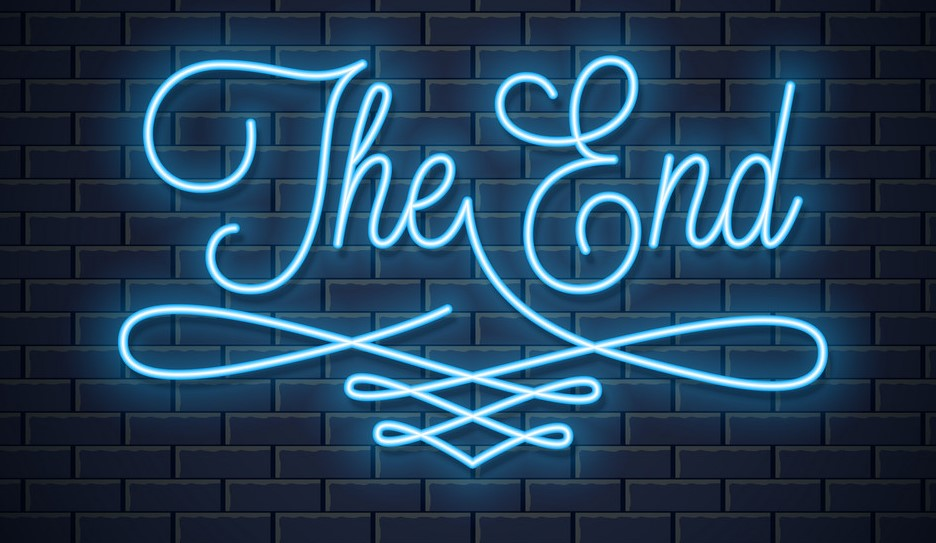